In [1]:
import os
os.chdir(r'E:/')


In [2]:
os.getcwd()

'E:\\'

In [3]:
# importing the libries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [4]:
df=pd.read_csv('vehicles.csv')

In [5]:
df.shape

(258888, 26)

In [6]:
df.columns

Index(['ad_title', 'ad_description', 'details', 'slug', 'title', 'type',
       'price', 'timestamp', 'posted_date', 'deactivation_date', 'category',
       'parent_category', 'location', 'geo_region', 'area', 'is_delivery_free',
       'is_doorstep_delivery', 'is_dsd_applicable', 'is_member',
       'is_authorized_dealer', 'is_featured_member', 'is_verified',
       'membership_level', 'member_since', 'properties', 'user'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258888 entries, 0 to 258887
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   ad_title              258888 non-null  object
 1   ad_description        258881 non-null  object
 2   details               155505 non-null  object
 3   slug                  258888 non-null  object
 4   title                 258888 non-null  object
 5   type                  258888 non-null  object
 6   price                 255077 non-null  object
 7   timestamp             258882 non-null  object
 8   posted_date           258882 non-null  object
 9   deactivation_date     258882 non-null  object
 10  category              258888 non-null  object
 11  parent_category       258888 non-null  object
 12  location              258888 non-null  object
 13  geo_region            258888 non-null  object
 14  area                  258888 non-null  object
 15  is_delivery_free 

In [8]:
df.isnull().sum()

ad_title                     0
ad_description               7
details                 103383
slug                         0
title                        0
type                         0
price                     3811
timestamp                    6
posted_date                  6
deactivation_date            6
category                     0
parent_category              0
location                     0
geo_region                   0
area                         0
is_delivery_free             0
is_doorstep_delivery         0
is_dsd_applicable            0
is_member                 9050
is_authorized_dealer      9050
is_featured_member        9050
is_verified                  0
membership_level             0
member_since            150254
properties                   0
user                         0
dtype: int64

In [9]:
df.describe()

,ad_title,ad_description,details,slug,title,type,price,timestamp,posted_date,deactivation_date,...,is_doorstep_delivery,is_dsd_applicable,is_member,is_authorized_dealer,is_featured_member,is_verified,membership_level,member_since,properties,user
count,258888,258881,155505,258888,258888,258888,255077,258882,258882,258882,...,258888,258888,249838,249838,249838,258888,258888,108634,258888,258888
unique,203314,193000,18053,258879,118237,2,5495,113463,252696,255120,...,1,1,2,2,2,2,3,90,135732,80719
top,Bicycle in Gampaha City | ikman,Good condition,"50,000 km",bajaj-re-2003-for-sale-kandy-62,Bicycle,for_sale,"Rs 25,000",08 Dec 1:04 pm,2023-03-08T10:25:58+05:30,2023-01-27T04:34:43.000Z,...,False,False,False,False,False,False,free,December 2016,{'Service type': 'Transport Services'},95a2c7432ab661901fd052b7830d959187641c1079efe3...
freq,89,1860,3115,2,3275,257731,2688,65,7,3,...,258888,258888,151134,249794,249824,190841,159394,9404,8560,2135


In [11]:
#dropping null value from column ad_desc
df.dropna(subset=['ad_description','timestamp','posted_date'], inplace=True)

In [12]:
#removing unwanted string and converting column type into numeric
df['details'] = df['details'].str.replace(r'[^\d\s]','', regex=True)
df['details'] = pd.to_numeric(df['details'], errors='coerce')

In [13]:
# Clean 'price' column and handle non-numeric values
df['price'] = df['price'].str.replace('Rs ', '').str.replace(',', '')
df['price'] = pd.to_numeric(df['price'], errors='coerce')  # 'coerce' handles non-numeric values by setting NaN

In [14]:
df

,ad_title,ad_description,details,slug,title,type,price,timestamp,posted_date,deactivation_date,...,is_doorstep_delivery,is_dsd_applicable,is_member,is_authorized_dealer,is_featured_member,is_verified,membership_level,member_since,properties,user
0,Nissan Tiida Alternator in Maharagama | ikman,**TISSA AUTO PARTS** Dealer of used Japanese m...,NaN,nissan-tiida-alternator-for-sale-colombo-3,Nissan Tiida Alternator,for_sale,18000.0,23 Feb 11:35 pm,2023-02-23T23:35:10+05:30,2022-05-30T17:13:04.000Z,...,False,False,True,False,False,True,premium,September 2019,"{'Condition': 'Reconditioned', 'Part or Access...",a6681dea494390daa516a6d2bdcb36e08c318574a13413...
1,Axio 165 Tail Light in Kotte | ikman,Imported from Japan \n\nRight side available \...,NaN,axio-165-tail-light-for-sale-colombo-14,Axio 165 Tail Light,for_sale,67000.0,23 Feb 8:32 am,2023-02-23T08:32:44+05:30,2022-03-31T16:27:59.000Z,...,False,False,True,False,False,True,plus,June 2018,"{'Condition': 'Reconditioned', 'Part or Access...",5d99b8e45a1bb318079da7a36392d9025e1644cb49ecbf...
2,Axio 165 / 161 Head light in Kotte | ikman.lk,Imported from Japan \n\nAuto focus headlight a...,NaN,axio-165-161-head-light-for-sale-colombo,Axio 165 / 161 Head light,for_sale,85000.0,01 Dec 8:27 pm,2022-12-01T20:27:49+05:30,2022-03-31T14:03:57.000Z,...,False,False,True,False,False,True,plus,June 2018,"{'Condition': 'Reconditioned', 'Part or Access...",5d99b8e45a1bb318079da7a36392d9025e1644cb49ecbf...
3,Vigo side step ( Foot board) in Kottawa | ikman,Hilux Vigo side step\nBrand New Thaiwan\nGood ...,NaN,vigo-side-step-foot-board-for-sale-colombo,Vigo side step ( Foot board),for_sale,47000.0,04 Dec 2:47 pm,2022-12-04T14:47:27+05:30,2022-07-29T13:22:59.000Z,...,False,False,True,False,False,False,plus,February 2017,"{'Condition': 'New', 'Part or Accessory Type':...",634d93e14a62d9de7b400ee3679ae1d5506f4252ff0580...
4,Vigo Dickey Door Garnish Cover in Kottawa | i...,"Hilux Vigo ( 2005, 2009 ) dickey door garnish set",NaN,vigo-dickey-door-garnish-cover-for-sale-colombo-1,Vigo Dickey Door Garnish Cover,for_sale,9000.0,08 Dec 9:28 am,2022-12-08T09:28:04+05:30,2022-07-29T12:55:44.000Z,...,False,False,True,False,False,False,plus,February 2017,"{'Condition': 'New', 'Part or Accessory Type':...",634d93e14a62d9de7b400ee3679ae1d5506f4252ff0580...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258883,Nissan March K10 1989 in Jaffna City | ikman,Very good condition\nno hidden errors\nsmooth ...,140000.0,nissan-march-k10-1989-for-sale-jaffna,Nissan March K10 1989,for_sale,1030000.0,01 Apr 11:41 am,2023-04-01T11:41:50+05:30,2023-05-31T06:11:16.000Z,...,False,False,False,False,False,False,free,NaN,"{'Brand': 'Nissan', 'Model': 'March', 'Trim / ...",48a910425b8f190b818a89d56b60a919c8b5297b0208ea...
258884,Toyota Allion 260 2009 in Battaramulla | ikman,Good Conditions Car\nGenuine mileage \nManufac...,219000.0,toyota-allion-260-2009-for-sale-colombo-83,Toyota Allion 260 2009,for_sale,3550000.0,30 Mar 10:10 am,2023-03-30T10:10:04+05:30,2023-05-29T04:36:57.000Z,...,False,False,False,False,False,False,free,NaN,"{'Brand': 'Toyota', 'Model': 'Allion', 'Trim /...",c9b739e56cdac87b2a966a338eb8508c15dd977445751b...
258885,Micro Trend Car for Rent in Colombo 3 | ikman,Unlimited km\nPer month 70000\nManual transmis...,NaN,micro-trend-unlimited-km-car-for-rent-for-sale...,Micro Trend Car for Rent,for_sale,70000.0,01 Apr 11:41 am,2023-04-01T11:41:13+05:30,2023-05-31T06:10:48.000Z,...,False,False,False,False,False,False,free,NaN,{'Service type': 'Car Rentals'},c7bf4bbdbcd88d9d7f7c7b299c94e9e52091af2fd2888e...
258886,Toyota Roomy custom GS safety 2018 in Borales...,Toyota Roomy Custom G\n2018 Model year \nMilea...,30000.0,toyota-roomy-custom-gs-safety-2018-for-sale-co...,Toyota Roomy custom GS safety 2018,for_sale,7250000.0,01 Apr 11:40 am,2023-04-01T11:40:57+05:30,2023-05-31T06:10:57.000Z,...,False,False,True,False,False,False,premium,December 2019,"{'Brand': 'Toyota', 'Model': 'Roomy

In [15]:


df.isnull().sum()

ad_title                     0
ad_description               0
details                 103382
slug                         0
title                        0
type                         0
price                     5484
timestamp                    0
posted_date                  0
deactivation_date            0
category                     0
parent_category              0
location                     0
geo_region                   0
area                         0
is_delivery_free             0
is_doorstep_delivery         0
is_dsd_applicable            0
is_member                 9049
is_authorized_dealer      9049
is_featured_member        9049
is_verified                  0
membership_level             0
member_since            150243
properties                   0
user                         0
dtype: int64

In [17]:
#imputing is_authorized_dealer and is_featured_member
mode_is_member=df['is_member'].mode()[0]
mode_authorized_dealer = df['is_authorized_dealer'].mode()[0]
mode_featured_member = df['is_featured_member'].mode()[0]

df['is_member'].fillna(mode_is_member, inplace=True)
df['is_authorized_dealer'].fillna(mode_authorized_dealer, inplace=True)
df['is_featured_member'].fillna(mode_featured_member, inplace=True)

In [18]:
df.price[167894]

5850000.0

In [19]:
#timestamp
df['timestamp'] = df['timestamp'].str.strip("'")

df['timestamp'] = pd.to_datetime(df['timestamp'], format='%d %b %I:%M %p', errors='coerce')

In [20]:
#posted_date
df['posted_date'] = pd.to_datetime(df['posted_date'], errors='coerce')

In [21]:
df['deactivation_date'] = pd.to_datetime(df['deactivation_date'], errors='coerce')

In [22]:
# dropping null values 
df.dropna(subset=['timestamp', 'posted_date', 'deactivation_date'], inplace=True)

In [23]:
#dropping irrelevant columns
df.drop(['slug', 'ad_title', 'user'], axis=1, inplace=True)

In [24]:
#converting area column in two columns
def extract_area_info(dict_str):
    if isinstance(dict_str, str):
        # Remove '{', '}', spaces
        dict_str = dict_str.strip('{} ')
        # Split by ', ' and extract 'id' and 'name'
        parts = dict_str.split(', ')
        area_id = None
        area_name = None
        
        for part in parts:
            key, value = part.split(': ')
            key = key.strip("'")
            value = value.strip("'")
            
            if key == 'id':
                area_id = int(value)
            elif key == 'name':
                area_name = value
        
        return area_id, area_name
    else:
        return None, None

df[['area_id', 'area_name']] = df['area'].apply(lambda x: pd.Series(extract_area_info(x)))

df.drop('area', axis=1, inplace=True)

In [25]:
import ast  #Abstract Syntax Trees
def extract_unique_keys(df, column_name):
    unique_keys = set()
    for row in df[column_name]:
        properties_dict = ast.literal_eval(row)
        unique_keys.update(properties_dict.keys())
    return unique_keys

# Extract unique keys from the 'properties' column
unique_keys = extract_unique_keys(df, 'properties')

In [26]:
unique_keys

{'Bike Type',
 'Body type',
 'Brand',
 'Condition',
 'Engine capacity',
 'Fuel type',
 'Mileage',
 'Model',
 'Model year',
 'Part or Accessory Type',
 'Service type',
 'Transmission',
 'Trim / Edition',
 'Vehicle Type',
 'Year of Manufacture'}

In [27]:
# Function to parse JSON-like strings safely
import json
def safe_json_parse(text):
    try:
        return json.loads(text.replace("'", '"'))
    except json.JSONDecodeError:
        return {}

# Define the selected keys to extract
selected_keys = ['Brand', 'Model', 'Year of Manufacture', 'Mileage', 'Condition', 'Engine capacity', 'Transmission']

# Extract and convert columns
for key in selected_keys:
    df[key] = [safe_json_parse(row).get(key) for row in df['properties']]

# Drop the original 'properties' column
df.drop('properties', axis=1, inplace=True)

In [28]:
# Drop the Milage column beacuse it is same as details column
df.drop('Mileage', axis=1, inplace=True)

In [29]:
# due to heavy number of null values lets drop some columns
columns_to_drop = ['Year of Manufacture', 'Engine capacity', 'Transmission']
df.drop(columns_to_drop, axis=1, inplace=True)

In [30]:
# Function to extract brand and model from title
def extract_brand_model(title):
    parts = title.split()
    brand = parts[0] if len(parts) > 0 else None
    model = parts[1] if len(parts) > 1 else None
    return brand, model

# Apply extraction function to fill Brand and Model in df1
df[['Brand', 'Model']] = df['title'].apply(lambda x: pd.Series(extract_brand_model(x)))

# Drop the title column in df1
df.drop('title', axis=1, inplace=True)

In [31]:
# Drop rows where the Model column has missing values
df.dropna(subset=['Model'], inplace=True)

In [32]:
df.isnull().sum()

ad_description               0
details                  98975
type                         0
price                     5462
timestamp                    0
posted_date                  0
deactivation_date            0
category                     0
parent_category              0
location                     0
geo_region                   0
is_delivery_free             0
is_doorstep_delivery         0
is_dsd_applicable            0
is_member                    0
is_authorized_dealer         0
is_featured_member           0
is_verified                  0
membership_level             0
member_since            145946
area_id                      0
area_name                    0
Brand                        0
Model                        0
Condition                20563
dtype: int64

In [33]:
df.drop(columns=['ad_description'], inplace=True)

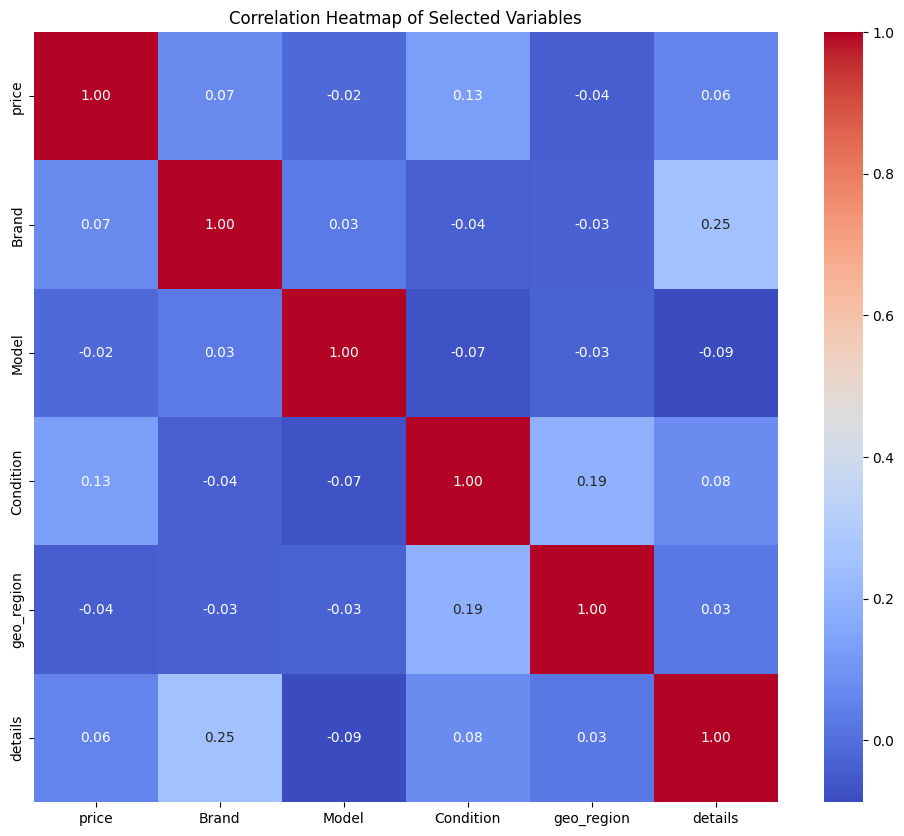

In [34]:
selected_features = ['price', 'Brand', 'Model', 'Condition', 'geo_region', 'details']

# Make a copy of the dataframe with selected features
df_copy = df[selected_features].copy()

# Encode categorical features
label_encoders = {}
for col in ['Brand', 'Model', 'Condition', 'geo_region']:
    if df_copy[col].dtype == 'object' or df_copy[col].dtype == 'category':
        le = LabelEncoder()
        df_copy[col] = le.fit_transform(df_copy[col].astype(str))
        label_encoders[col] = le

# Check for correlation
corr_matrix = df_copy.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap of Selected Variables')
plt.show()

In [35]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

# Split data into known and unknown 'details'
known_details = df_copy[df_copy['details'].notnull()]
unknown_details = df_copy[df_copy['details'].isnull()]

# Features and target
X_train = known_details.drop('details', axis=1)
y_train = known_details['details']

# Impute missing values in features
imputer = SimpleImputer(strategy='mean')  # or use other strategies like 'median', 'most_frequent', etc.
X_train_imputed = imputer.fit_transform(X_train)

# Train Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_imputed, y_train)

# Predict missing 'details'
X_test = unknown_details.drop('details', axis=1)
X_test_imputed = imputer.transform(X_test)
predicted_details = rf.predict(X_test_imputed)

# Fill missing 'details' in original dataframe
df_copy.loc[df_copy['details'].isnull(), 'details'] = predicted_details

# Update the original dataframe with the imputed 'details' column
df['details'] = df_copy['details']

# Check the updated DataFrame
print(df.head())


     details      type    price           timestamp               posted_date  \
0  97470.522  for_sale  18000.0 1900-02-23 23:35:00 2023-02-23 23:35:10+05:30   
1  59827.360  for_sale  67000.0 1900-02-23 08:32:00 2023-02-23 08:32:44+05:30   
2  60597.390  for_sale  85000.0 1900-12-01 20:27:00 2022-12-01 20:27:49+05:30   
3  70112.840  for_sale  47000.0 1900-12-04 14:47:00 2022-12-04 14:47:27+05:30   
4   9044.080  for_sale   9000.0 1900-12-08 09:28:00 2022-12-08 09:28:04+05:30   

          deactivation_date                  category parent_category  \
0 2022-05-30 17:13:04+00:00  Auto Parts & Accessories        Vehicles   
1 2022-03-31 16:27:59+00:00  Auto Parts & Accessories        Vehicles   
2 2022-03-31 14:03:57+00:00  Auto Parts & Accessories        Vehicles   
3 2022-07-29 13:22:59+00:00  Auto Parts & Accessories        Vehicles   
4 2022-07-29 12:55:44+00:00  Auto Parts & Accessories        Vehicles   

     location geo_region  ...  is_authorized_dealer  is_featured_member  \

In [36]:
df.Condition.unique()

array(['Reconditioned', 'New', None, 'Used'], dtype=object)

In [39]:
import gc
gc.collect()

0

In [46]:
df['Condition'].fillna(df['Condition'].mode()[0], inplace=True)

In [47]:
median_price = df['price'].median()
df['price'].fillna(median_price, inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_7580\3531788644.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['price'].fillna(median_price, inplace=True)


In [48]:
df.isnull().sum()

details                      0
type                         0
price                        0
timestamp                    0
posted_date                  0
deactivation_date            0
category                     0
parent_category              0
location                     0
geo_region                   0
is_delivery_free             0
is_doorstep_delivery         0
is_dsd_applicable            0
is_member                    0
is_authorized_dealer         0
is_featured_member           0
is_verified                  0
membership_level             0
member_since            145946
area_id                      0
area_name                    0
Brand                        0
Model                        0
Condition                    0
dtype: int64

In [49]:
df.shape

(254441, 24)

In [50]:
df.dtypes

details                                   float64
type                                       object
price                                     float64
timestamp                          datetime64[ns]
posted_date             datetime64[ns, UTC+05:30]
deactivation_date             datetime64[ns, UTC]
category                                   object
parent_category                            object
location                                   object
geo_region                                 object
is_delivery_free                             bool
is_doorstep_delivery                         bool
is_dsd_applicable                            bool
is_member                                    bool
is_authorized_dealer                         bool
is_featured_member                           bool
is_verified                                  bool
membership_level                           object
member_since                               object
area_id                                     int64


# First Model: Predicting Price

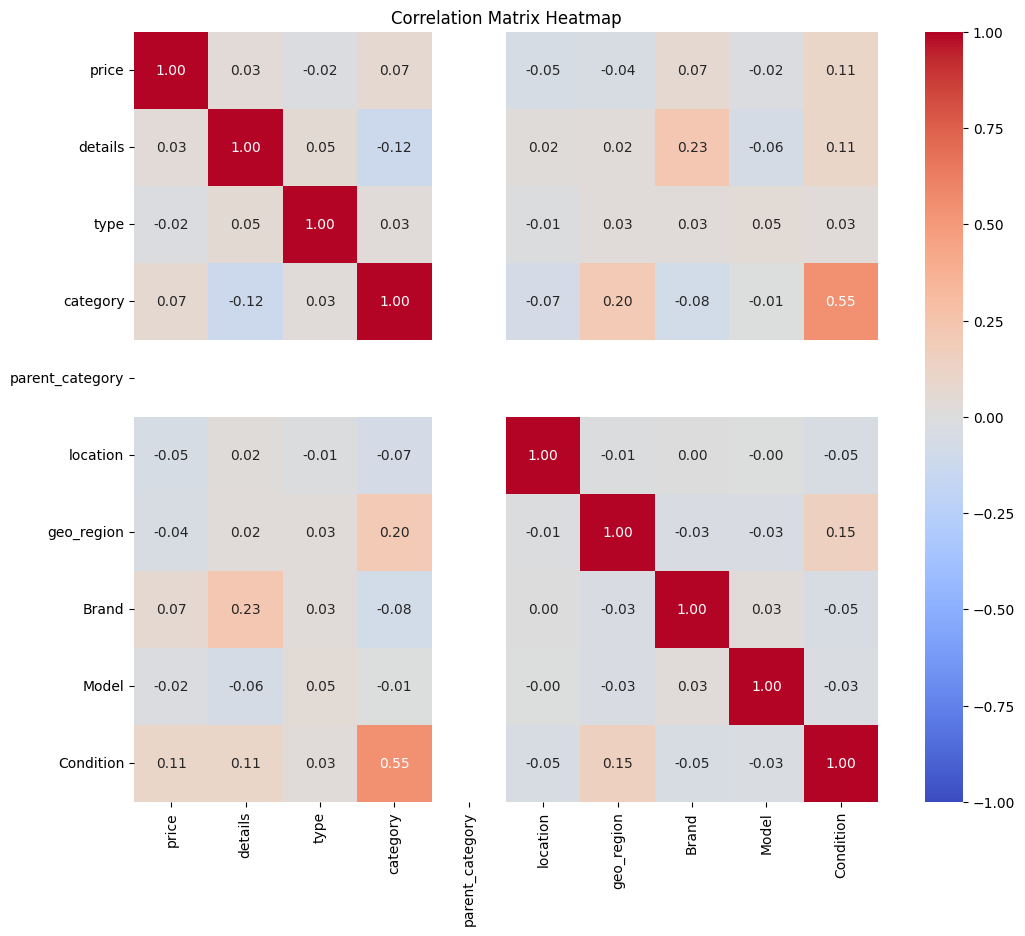

In [51]:
df_encoded = df.copy()  # Make a copy of the original DataFrame

# List of relevant categorical columns to encode
cat_cols = ['type', 'category', 'parent_category', 'location', 'geo_region', 'Brand', 'Model', 'Condition']

# Apply LabelEncoder to categorical columns
encoder = LabelEncoder()

for col in cat_cols:
    df_encoded[col] = encoder.fit_transform(df_encoded[col].astype(str))

# Select relevant columns for correlation analysis
relevant_cols = ['price', 'details'] + cat_cols

# Subset the DataFrame with relevant columns
df_corr = df_encoded[relevant_cols]

# Compute correlation matrix
corr_matrix = df_corr.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [52]:
cols_to_keep = ['details', 'type', 'price', 'timestamp', 'posted_date',
                'deactivation_date', 'category', 'parent_category', 'location',
                'geo_region', 'Brand', 'Model', 'Condition']
df_filtered = df_encoded[cols_to_keep].copy()

# Encode categorical columns
cat_cols = ['type', 'category', 'parent_category', 'location', 'geo_region', 'Brand', 'Model', 'Condition']
encoder = LabelEncoder()

for col in cat_cols:
    df_filtered[col] = encoder.fit_transform(df_filtered[col].astype(str))

# Extract useful components from datetime features
df_filtered['year'] = df_filtered['timestamp'].dt.year
df_filtered['month'] = df_filtered['timestamp'].dt.month
df_filtered['day'] = df_filtered['timestamp'].dt.day

# Drop original datetime columns
df_filtered.drop(['timestamp', 'posted_date', 'deactivation_date'], axis=1, inplace=True)

# Define features and target
X = df_filtered.drop(['price'], axis=1)
y = df_filtered['price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Lasso model
lasso = Lasso(alpha=0.1, random_state=42)

# Fit Lasso model
lasso.fit(X_train, y_train)

# Print feature coefficients
feature_coef = pd.Series(lasso.coef_, index=X.columns)
sorted_features = feature_coef.abs().sort_values(ascending=False)
selected_features = sorted_features[sorted_features != 0]
print("Selected Features:\n", selected_features)

Selected Features:
 type          2.307527e+06
Condition     9.204676e+05
category      1.212460e+05
geo_region    1.011625e+05
month         2.670420e+04
day           4.400413e+03
Brand         2.919362e+02
location      2.107593e+02
Model         4.036422e+01
details       1.252347e+00
dtype: float64


In [53]:
# different model
# linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score

# Initialize Linear Regression model
model_lr = LinearRegression()

# Cross-validation
cv_scores = cross_val_score(model_lr, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_lr = np.sqrt(-cv_scores).mean()

# Fit model
model_lr.fit(X_train, y_train)

# Predict on test set
y_pred_lr = model_lr.predict(X_test)

# Calculate evaluation metrics
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Print results
print("Linear Regression Results:")
print(f"Cross-Validated RMSE: {rmse_lr:.4f}")
print(f"MAE: {mae_lr:.4f}")
print(f"R² Score: {r2_lr:.4f}")


Linear Regression Results:
Cross-Validated RMSE: 7216336.3526
MAE: 2506168.5720
R² Score: 0.0425


In [54]:
#Fit: The R² score of 0.0427 indicates that the Linear Regression model explains only about 4.27% of the variance in the target variable (price). 
#This suggests that the model is not capturing much of the variability in the data and is underfitting.

In [55]:
# Decision Tree Regression with Hyperparameter Tuning
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Define parameter grid for GridSearchCV
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Decision Tree Regression model
model_dt = DecisionTreeRegressor(random_state=42)

# GridSearchCV for hyperparameter tuning
grid_search_dt = GridSearchCV(model_dt, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_dt.fit(X_train, y_train)

# Best parameters and best score
best_params_dt = grid_search_dt.best_params_
best_score_dt = np.sqrt(-grid_search_dt.best_score_)

# Fit model with best parameters
model_dt_best = grid_search_dt.best_estimator_
model_dt_best.fit(X_train, y_train)

# Predict on test set
y_pred_dt = model_dt_best.predict(X_test)

# Calculate evaluation metrics
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

# Print results
print("Decision Tree Regression Results:")
print(f"Best Parameters: {best_params_dt}")
print(f"Cross-Validated RMSE: {best_score_dt:.4f}")
print(f"MAE: {mae_dt:.4f}")
print(f"R² Score: {r2_dt:.4f}")



Decision Tree Regression Results:
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Cross-Validated RMSE: 6082464.2985
MAE: 815596.7357
R² Score: 0.6626


In [56]:
#Fit: The Decision Tree Regression model shows a significantly better R² score of 0.6830, indicating that it explains approximately 68.30% of the variance in the target variable. 
#This suggests a much better fit compared to Linear Regression.

In [57]:
# Ridge Regression
from sklearn.linear_model import RidgeCV

# Initialize Ridge Regression model with cross-validation
alphas = [0.1, 1.0, 10.0]
model_ridge = RidgeCV(alphas=alphas, cv=5)

# Fit model
model_ridge.fit(X_train, y_train)

# Predict on test set
y_pred_ridge = model_ridge.predict(X_test)

# Calculate evaluation metrics
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Print results
print("Ridge Regression Results:")
print(f"Best Alpha: {model_ridge.alpha_}")
print(f"MAE: {mae_ridge:.4f}")
print(f"R² Score: {r2_ridge:.4f}")


C:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.6927e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.6025e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.64709e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.69858e-17): result may not be accurate.
  return linalg.solve(A

Ridge Regression Results:
Best Alpha: 1.0
MAE: 2506164.4414
R² Score: 0.0425


In [58]:
#Fit: The Ridge Regression model shows an R² score similar to that of Linear Regression, at 0.0427, indicating a similar level of fit to the data.

# Section 2: User Segmentation

In [60]:
# Fill missing values with the mean for numerical columns and mode for categorical columns
df.fillna(df.mean(), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)


TypeError: can only concatenate str (not "int") to str

In [61]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le


In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

# Exclude non-numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Standardize the numeric features
scaler = StandardScaler()
scaled_df = scaler.fit_transform(numeric_df)

# Applying PCA
pca = PCA(n_components=0.95)  # Keeps 95% of variance
principal_components = pca.fit_transform(scaled_df)

# Creating a DataFrame with principal components
df_pca = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(principal_components.shape[1])])

# Print the resulting PCA DataFrame
print(df_pca.head())


        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -1.992448  0.588794  0.236260 -0.849913  0.692027 -0.871926  0.308085   
1 -1.783234  0.542155 -0.947223 -0.808727 -1.814540  1.447894  0.342271   
2 -1.783265  0.541588 -0.939984 -0.807855 -1.815625  1.448202  0.342562   
3 -2.937777  1.386510  0.339881 -1.014656  1.423503 -1.481246 -0.483027   
4 -2.827785  1.356974  0.013430 -1.007955 -0.568673  0.052327 -0.506442   

        PC8       PC9      PC10      PC11  
0  0.451997  0.085958 -0.270904  0.031101  
1  0.408883  0.130714 -0.428231 -0.113319  
2  0.407849  0.130887 -0.434222 -0.110476  
3  0.767812  0.277554  0.386019  0.757120  
4  0.917281  0.168043  1.534197  0.514278  


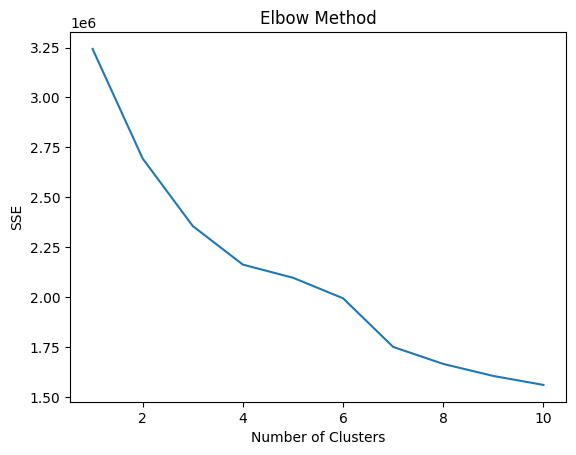

For n_clusters = 2, the average silhouette score is: 0.1892932282670404
              details      type         price                     timestamp  \
Cluster                                                                       
0        85117.536934  0.007180  2.076089e+06 1900-06-19 23:20:04.746100224   
1        77695.452298  0.000011  2.339012e+06 1900-05-30 05:47:51.347272192   
2        87132.692911  0.006885  1.549663e+06 1900-06-19 19:23:36.540482560   

                                posted_date  \
Cluster                                       
0       2023-01-06 11:23:26.735854336+05:30   
1       2023-01-13 16:39:59.185692672+05:30   
2       2023-01-06 12:41:49.627453184+05:30   

                          deactivation_date  category  parent_category  \
Cluster                                                                  
0       2023-03-05 16:33:40.789119744+00:00  6.300817              0.0   
1       2023-02-12 20:17:32.144656128+00:00  2.799355              0.0   


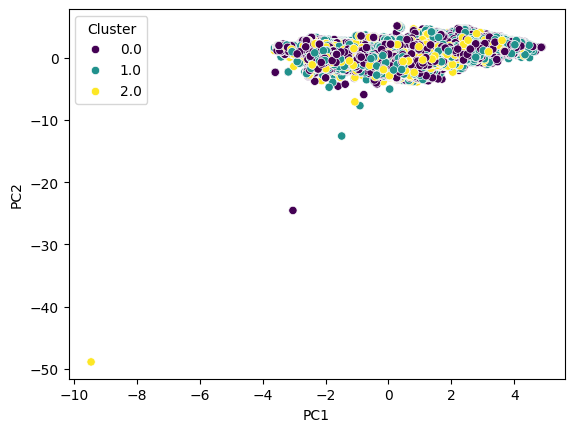

In [63]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns

# 1. Exclude non-numeric columns
numeric_df = df.select_dtypes(include=['number'])

# 2. Standardize the numeric features
scaler = StandardScaler()
scaled_df = scaler.fit_transform(numeric_df)

# 3. Applying PCA
pca = PCA(n_components=0.95)  # Keeps 95% of variance
principal_components = pca.fit_transform(scaled_df)

# 4. Creating a DataFrame with principal components
df_pca = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(principal_components.shape[1])])

# 5. Clustering
# Elbow Method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

# Silhouette Score
for k in range(2, 3):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_pca)
    silhouette_avg = silhouette_score(df_pca, labels)
    print(f"For n_clusters = {k}, the average silhouette score is: {silhouette_avg}")

# Apply KMeans with the optimal number of clusters (let's assume k=3)
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_pca)

# 6. Cluster Analysis
# Calculate the mean of features for each cluster
cluster_means = df.groupby('Cluster').mean()

# Display the cluster means
print(cluster_means)

# Plotting clusters for visualization
df_plot = pd.DataFrame(data=principal_components[:, :2], columns=['PC1', 'PC2'])
df_plot['Cluster'] = df['Cluster']
sns.scatterplot(data=df_plot, x='PC1', y='PC2', hue='Cluster', palette='viridis')
plt.show()


In [64]:
 # Replace with actual feature names
selected_features = ['price', 'geo_region', 'category']
df_selected = df[selected_features]
print(df_selected.head())


     price  geo_region  category
0  18000.0           1         0
1  67000.0           1         0
2  85000.0           1         0
3  47000.0           1         0
4   9000.0           1         0


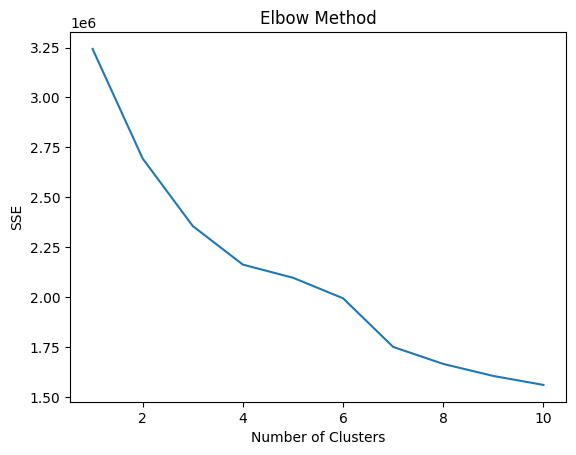

For n_clusters = 2, the average silhouette score is: 0.1892932282670404


In [65]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Using the PCA-transformed data if PCA was applied, otherwise use selected features
data_for_clustering = df_pca if 'df_pca' in locals() else df_selected

# Elbow Method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_for_clustering)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

# Silhouette Score
for k in range(2, 3):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data_for_clustering)
    silhouette_avg = silhouette_score(data_for_clustering, labels)
    print(f"For n_clusters = {k}, the average silhouette score is: {silhouette_avg}")

# Apply KMeans with the optimal number of clusters (let's assume k=3 from the Elbow Method and Silhouette Score)
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(data_for_clustering)
